# Example 6: Markov Stability applied to signed graph

This demo implements some additional analysis of the Harari Highland tribe data, related to the one discussed in Michael T. Schaub, Jean-Charles Delvenne, Renaud Lambiotte, Mauricio Barahona "Multiscale dynamical embeddings of complex networks" https://arxiv.org/abs/1804.03733

In [1]:
import networkx as nx
import numpy as np
import scipy.sparse as sp

from pygenstability import run, plotting, constructors
from pygenstability.optimal_scales import identify_optimal_scales

In [2]:
import mat73

# load Harari data
data_dict = mat73.loadmat('harari_data.mat')
A_neg = data_dict["A_neg"]
A_pos = data_dict["A_pos"]
adjacency = A_pos - A_neg

# labels
labels = np.asarray([
    'GAVEV',
    'KOTUN',
    'OVE',
    'ALIKA',
    'NAGAM',
    'GAHUK',
    'MASIL',
    'UKUDZ',
    'NOTOH',
    'KOHIK',
    'GEHAM',
    'ASARO',
    'UHETO',
    'SEUVE',
    'NAGAD',
    'GAMA'])

# Create nx graph
nx_graph = nx.from_numpy_array(adjacency)

In [3]:
# apply MS analysis using signed modularity
all_results = run(sp.csgraph.csgraph_from_dense(adjacency), 
                  min_scale=-1, 
                  max_scale=1.0, 
                  n_scale=90, 
                  constructor="signed_modularity")

You have negative weights, consider using signed constructor.
100%|██████████| 90/90 [00:00<00:00, 842.61it/s]


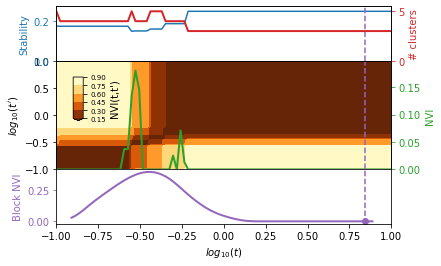

In [4]:
# select optimal scales
all_results = identify_optimal_scales(all_results,kernel_size=30,window_size=10)
_ = plotting.plot_scan(all_results)

In [5]:
# compute graph layout
pos = nx.spring_layout(nx_graph, weight=None, scale=1)
for u in nx_graph:
    nx_graph.nodes[u]["pos"] = pos[u]


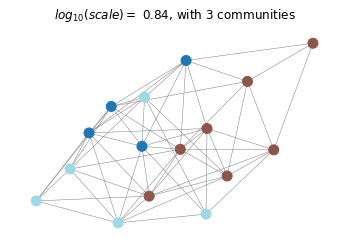

In [6]:
# plot optimal partitions
plotting.plot_optimal_partitions(nx_graph, all_results, show=True)

In [7]:
# labels for clusters in optimal partition
optimal_partition = all_results["community_id"][all_results["selected_partitions"][0]]
print("Cluster 1:", labels[optimal_partition == 0])
print("Cluster 2:", labels[optimal_partition == 1])
print("Cluster 3:", labels[optimal_partition == 2])

Cluster 1: ['GAVEV' 'KOTUN' 'NAGAD' 'GAMA']
Cluster 2: ['OVE' 'ALIKA' 'GAHUK' 'MASIL' 'UKUDZ' 'GEHAM' 'ASARO']
Cluster 3: ['NAGAM' 'NOTOH' 'KOHIK' 'UHETO' 'SEUVE']


In [13]:
# apply MS analysis using signed combinatorial Laplacian
all_results = run(sp.csgraph.csgraph_from_dense(adjacency), 
                  min_scale=-2.0, 
                  max_scale=1.0, 
                  n_scale=90, 
                  constructor="signed_combinatorial")

You have negative weights, consider using signed constructor.
100%|██████████| 90/90 [00:00<00:00, 615.10it/s]


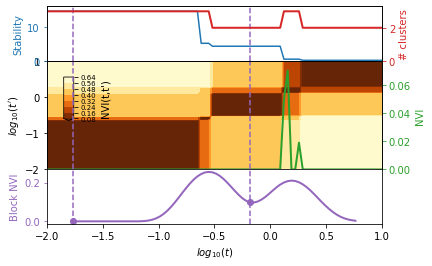

In [17]:
# select optimal scales
all_results = identify_optimal_scales(all_results,kernel_size=20,window_size=15)
_ = plotting.plot_scan(all_results)

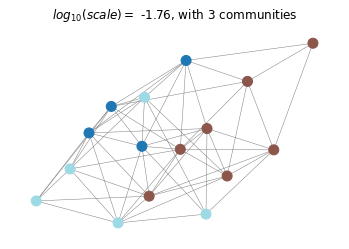

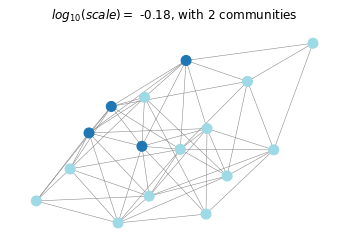

In [18]:
# plot optimal partitions
plotting.plot_optimal_partitions(nx_graph, all_results, show=True)

In [19]:
# labels for clusters in 1st optimal partition
optimal_partition = all_results["community_id"][all_results["selected_partitions"][0]]
print("Cluster 1:", labels[optimal_partition == 0])
print("Cluster 2:", labels[optimal_partition == 1])
print("Cluster 3:", labels[optimal_partition == 2])

Cluster 1: ['GAVEV' 'KOTUN' 'NAGAD' 'GAMA']
Cluster 2: ['OVE' 'ALIKA' 'GAHUK' 'MASIL' 'UKUDZ' 'GEHAM' 'ASARO']
Cluster 3: ['NAGAM' 'NOTOH' 'KOHIK' 'UHETO' 'SEUVE']


In [20]:
# labels for clusters in 2nd optimal partition
optimal_partition = all_results["community_id"][all_results["selected_partitions"][1]]
print("Cluster 1:", labels[optimal_partition == 0])
print("Cluster 2:", labels[optimal_partition == 1])

Cluster 1: ['GAVEV' 'KOTUN' 'NAGAD' 'GAMA']
Cluster 2: ['OVE' 'ALIKA' 'NAGAM' 'GAHUK' 'MASIL' 'UKUDZ' 'NOTOH' 'KOHIK' 'GEHAM'
 'ASARO' 'UHETO' 'SEUVE']
